In [1]:
import gym
import os
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
# Environment initialization
env = gym.make('Taxi-v2')

[2018-04-22 09:21:19,016] Making new env: Taxi-v2


In [3]:
# Q and rewards
def run_Q(alpha = 0.75, discount = 0.95 , episodes = 10000, explore_scheme = "noise"):
    """
    schemes : "noise", "e-greedy", "random"
    
    """
    
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    iterations = []
    epsilon = 0.9
    decay_param = .000000024


    time1 = time.time()
    for episode in range(episodes):
        # Refresh state
        state = env.reset()
        done = False
        t_reward = 0
        max_steps = env.spec.tags.get('wrapper_config.TimeLimit.max_episode_steps')

        # Run episode
        for i in range(max_steps):
            if done:
                break

            current = state
            
            ### explore scheme -- choose action
            
            if explore_scheme == "noise":
                action = np.argmax(Q[current,:] + np.random.randn(1, env.action_space.n) * (1 / float(episode + 1)))
            elif explore_scheme == "random":
                action = env.action_space.sample()

            elif explore_scheme == "e-greedy":
                #epsilon = self.epsilon * np.exp(-self.epsilon_decay_param * self.episode)

                if epsilon > 0.1:  #always explore 10% of the time.
                    epsilon = epsilon * np.exp(-decay_param*episode)
                
                if np.random.random() > epsilon:
                    action = np.argmax(Q[current,:])
                else:
                    action = env.action_space.sample()


            state, reward, done, info = env.step(action)
            t_reward += reward
            Q[current, action] += alpha * (reward + discount * np.max(Q[state,:]) - Q[current, action])

        rewards.append(t_reward)
        iterations.append(i)

    time2 = time.time()   
    print('with alpha: {}, gamma : {}, and episodes: {} and scheme: {}'.format(alpha,discount,episodes, explore_scheme ))
    print('took {:3f} ms'.format(float(time2-time1)*1000.0))

    
    policy = np.argmax(Q, axis=1)
    
    return (policy, rewards, episodes, epsilon)

In [4]:
def test_policy_Taxi(policy, env_name):
    problem = gym.make(env_name)
    done = False
    total_rewards = []
    num_steps = []
    for i in range(1000):
        state = problem.reset()
        done = False
        i = 0
        ep_reward = 0
        while not done:
            #print ("state is :{} ".format(state))
            #print (agent.Q[state])

            action = policy[state]
            #print ("action is :{}".format(action))

            state , reward, done, _ = problem.step(action)
            i +=1
            ep_reward+=reward
            #problem.render()
        #problem.render()
        total_rewards.append(ep_reward)
        num_steps.append(i)

    print ("Average Episode Reward: {}".format(np.mean(total_rewards)))
    print ("Average Steps: {}".format(np.mean(num_steps)))

In [5]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

def plot_rewards(episodes, rewards, params):
    a,d,e,ex = params    
    size = episodes // 50
    chunks = list(chunk_list(rewards, size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]

    plt.plot(list(range(0, len(rewards), size)), averages)
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title('Alpha : {}, Discount: {}, Episodes: {}, Explore: {}'.format(a,d,e,ex))
    plt.show()

with alpha: 0.75, gamma : 0.95, and episodes: 20000 and scheme: noise
took 11831.393003 ms


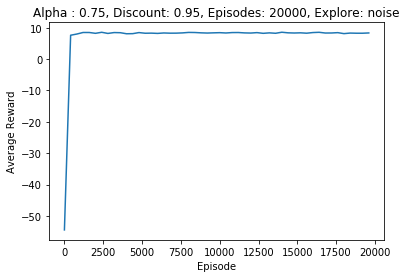

[2018-04-22 09:27:16,449] Making new env: Taxi-v2


policy is : [0 4 4 4 0 0 2 0 0 0 0 0 0 0 2 0 5 0 0 0 0 3 3 3 0 0 0 0 0 3 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 1 0 3 0 3 2 0 2 2 0 3 0 3 0 0
 0 0 0 2 0 0 0 0 3 3 4 0 4 4 0 0 0 0 0 3 3 0 0 5 0 3 0 1 1 1 2 0 2 2 0 0 0
 0 0 0 2 0 1 2 0 2 0 1 3 1 2 0 2 2 0 0 0 0 2 0 0 0 1 2 0 0 0 3 0 3 2 0 1 2
 0 3 0 0 2 0 2 0 3 1 3 0 0 0 0 3 1 0 1 1 3 0 0 3 0 0 0 0 3 1 3 0 0 3 3 3 1
 0 1 1 3 3 0 0 3 3 0 0 3 1 3 0 0 1 1 1 1 0 2 2 0 0 0 0 2 2 2 0 1 2 0 2 0 3
 1 1 2 0 2 1 3 3 0 3 2 2 2 0 3 1 3 2 0 3 3 1 1 0 1 1 3 3 0 3 2 2 2 0 3 2 3
 2 0 3 3 1 1 0 1 1 3 3 0 3 0 0 0 0 3 2 3 0 0 3 3 3 1 0 1 1 3 3 0 3 0 3 3 0
 3 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 0 1 0 2 1 0 3 3 3 1 0 1 1 3 3 0 3 1 1 1 0 0 2 1 1 0 1 1 1 2 0 1 1 2 1
 0 1 0 0 0 0 1 2 1 0 0 3 3 3 1 0 3 1 1 3 0 1 0 3 0 0 2 1 1 3 0 1 1 1 1 0 1
 1 4 4 0 4 1 1 1 0 1 1 5 1 0 1 1 2 1 0 1 1 1 1 0 1 2 1 2 0 2 0 2 1 0 3 3 1
 1 0 1 3 3 3 0 1 1 3 1 0 0 0 1 3 0 1 1 1 1 0 1 1 2 1 0 1 4 4 4 0 1 1 1 5 0
 1 1 3 1 0 1 

In [10]:
params = {'alpha':0.75, 'discount' : 0.95 , 'episodes' : 20000, 'explore_scheme' : "noise"}
policy1, rewards, episodes, epsilon = run_Q(**params)

prams = (params['alpha'], params['discount'], params['episodes'], params['explore_scheme'])
plot_rewards(episodes, rewards, prams)
print ("policy is : {}".format(policy1))

test_policy_Taxi(policy1,'Taxi-v2' )

with alpha: 0.75, gamma : 0.95, and episodes: 20000 and scheme: random
took 102203.184128 ms


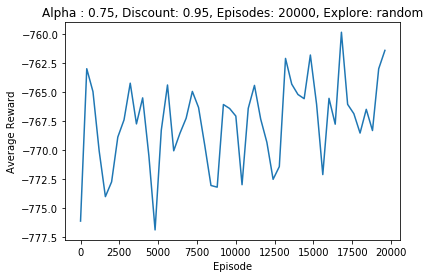

[2018-04-22 09:28:59,035] Making new env: Taxi-v2


policy is : [0 4 4 4 0 0 0 0 0 0 0 0 0 2 0 0 5 2 0 0 0 3 3 3 0 0 0 0 3 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 2 2 0 0 2 0 0 0 3 3 0 2 0 2 2 0 3 0 0 0 0
 0 0 3 2 3 0 0 3 3 3 4 0 4 4 3 0 0 3 0 0 3 0 3 5 0 0 0 1 1 1 2 0 2 2 0 0 0
 0 2 0 0 0 1 2 0 0 0 3 3 3 2 0 2 2 0 3 0 0 2 2 2 0 3 2 0 0 0 3 3 3 2 0 1 2
 0 3 0 0 2 2 0 0 3 1 0 0 0 3 3 3 2 0 2 1 3 3 0 0 0 0 0 0 3 2 3 0 0 3 3 3 1
 0 1 1 0 3 0 3 0 0 3 0 3 1 3 0 0 1 1 1 1 0 2 2 0 0 0 0 2 2 2 0 1 2 0 2 0 1
 1 1 1 0 2 1 3 3 0 3 2 2 2 0 1 2 3 2 0 1 3 1 1 0 2 2 3 3 0 3 2 2 2 0 3 1 3
 2 0 3 3 3 2 0 1 1 3 3 0 3 0 0 0 0 3 1 3 0 0 1 3 3 1 0 1 1 3 3 0 3 0 0 0 0
 3 1 3 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 2 0 1 1 1 1 0 1 1
 1 2 0 1 2 1 2 0 1 1 3 1 0 1 1 1 1 0 3 1 1 1 0 1 1 3 1 0 1 1 1 2 0 1 1 1 1
 0 1 0 0 0 0 1 1 1 0 0 3 3 1 1 0 1 1 1 3 0 1 0 3 3 0 1 1 1 0 0 1 1 1 1 0 1
 1 4 4 0 4 1 1 1 0 1 1 5 1 0 1 1 1 1 0 1 1 1 1 0 1 1 2 1 0 1 2 1 1 0 1 3 1
 1 0 1 1 3 1 0 1 1 1 1 0 1 1 3 1 0 1 1 1 1 0 2 1 1 1 0 1 4 4 4 0 1 1 1 5 0
 3 1 1 1 0 1 

In [11]:
params = {'alpha':0.75, 'discount' : 0.95 , 'episodes' : 20000, 'explore_scheme' : "random"}
policy2, rewards, episodes, epsilon = run_Q(**params)

prams = (params['alpha'], params['discount'], params['episodes'], params['explore_scheme'])
plot_rewards(episodes, rewards, prams)
print ("policy is : {}".format(policy2))

test_policy_Taxi(policy2, 'Taxi-v2' )

with alpha: 0.75, gamma : 0.95, and episodes: 20000 and scheme: e-greedy
took 9648.568153 ms


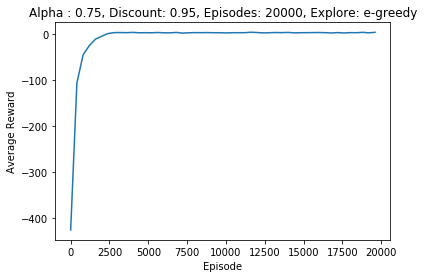

[2018-04-22 09:29:09,034] Making new env: Taxi-v2


policy is : [0 4 4 4 0 0 0 0 0 0 0 0 2 0 2 0 5 0 0 0 0 3 3 3 0 0 0 3 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 3 3 2 0 2 2 0 0 0 3 0 0
 0 0 0 2 0 0 0 3 3 0 4 0 4 4 3 3 0 3 0 0 3 0 0 5 0 3 0 1 1 1 2 0 2 2 0 0 0
 0 2 2 2 0 1 2 0 0 0 1 1 1 2 0 2 2 0 0 0 3 2 2 2 0 1 2 0 2 0 3 3 3 2 0 2 2
 0 0 0 3 0 2 2 0 3 1 0 0 0 3 3 3 1 0 1 1 3 0 0 0 0 0 0 0 3 1 0 0 0 0 3 3 1
 0 1 1 0 3 0 3 0 3 0 0 3 1 0 3 0 1 1 1 2 0 2 1 0 0 0 0 2 2 2 0 1 1 0 2 0 1
 1 1 2 0 2 2 3 3 0 3 2 2 2 0 1 1 3 2 0 1 1 1 1 0 1 2 3 3 0 3 2 2 2 0 3 1 3
 2 0 3 3 3 2 0 1 1 3 3 0 3 0 0 0 0 1 1 3 0 0 3 3 3 1 0 1 1 3 3 0 3 3 3 3 0
 3 1 3 3 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 2 0 1 2 1 1 0 1 2
 2 2 0 1 2 1 1 0 1 1 1 1 0 1 1 1 1 0 3 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 1 1 0 0 3 1 1 1 0 1 1 1 3 0 1 3 3 3 0 1 1 1 3 0 1 1 1 1 0 1
 1 4 4 0 4 1 1 1 0 1 1 5 1 0 1 1 1 1 0 1 1 1 1 0 1 2 1 1 0 1 1 1 1 0 3 3 1
 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 4 4 4 0 1 1 1 5 0
 1 1 1 1 0 1 

In [12]:
params = {'alpha':0.75, 'discount' : 0.95 , 'episodes' : 20000, 'explore_scheme' : "e-greedy"}
policy3, rewards, episodes, epsilon = run_Q(**params)

prams = (params['alpha'], params['discount'], params['episodes'], params['explore_scheme'])
plot_rewards(episodes, rewards, prams)
print ("policy is : {}".format(policy3))

test_policy_Taxi(policy3,'Taxi-v2' )

In [20]:
def diff_pol(pol1, pol2):
    return sum([abs(x-y) for x, y in zip(pol1.flatten(), pol2.flatten())])


In [22]:
print ("1 - 2:",diff_pol(policy1,policy2))
print ("1 - 3:",diff_pol(policy1,policy3))
print ("2 - 3:",diff_pol(policy2,policy3))

1 - 2: 201
1 - 3: 192
2 - 3: 163
